# Feature Engineering and Data Preparation - Download Data

--- 

## Description

In this Notebook we perform basic data cleansing and extract useful features for our analysis in subsequent Notebooks. Depending on the ML model additional pre-processing of the data is necessary. 

Based on existing features in the raw data, we use three general approaches: 
1. Extracting Information
2. Combining Information
3. Transforming Information

## Requirements

Requirements for the Notebook environment can be found [here](https://github.com/luiul/statistics-meets-logistics/blob/main/requirements.txt). The Notebook has not been tested in other environments. 


## Goal 

The goal of this Notebook is to generate more usesable data for ML model in subsequent Notebooks. 


## Architecture Model Described in ML Paper
<img src="./figures/architecture.png" width="600" alt="Architecture model for the client-based data rate prediction." class="center">


## From ML Paper: Boosting VtC Communication by ML-enabled Context Prediction

Article propose a client-side opportunistic transmission scheme that applies machine learning-based data rate prediction for scheduling the transmission times of sensor data transmissions with respect to the expected resource-efficiency

The studies agree that passively measurable network quality indicators such as Reference Signal Received Power (RSRP), Reference Signal Received Quality (RSRQ), Signal- to-interference-plus-noise Ratio (SINR), and Channel Quality Indicator (CQI) provide meaningful information, which can be leveraged to estimate the resulting data rate based on machine learning methods even in challenging environments. In comparison to time series-based active data rate prediction (e.g., based on Kalman filters), passive approaches do not monitor the data rates of ongoing transmissions and can therefore be applied without introducing additional traffic themselves. As resource efficiency is one of the optimization goals of this work, we focus on passive data rate prediction.

In this context, the usage of connectivity maps for anticipatory communication allows to exploit a priori information about the channel quality based on previous measurements in the same geographical area. Radio Environment Maps (REMs) implement a similar concept, which enables opportunistic data transfer with Cognitive Radio (CR) methods. However, those purely spectrum-aware approaches do not consider the cross-layer interdependencies within the protocol stack. Moreover, as the resource allocation in LTE is performed by the scheduling mechanisms of the evolved NodeB (eNB), those methods have to be implemented by the mobile network operator. In contrast to that, the proposed machine learning-based approach can easily be implemented on the client side without requiring modifications to the network infrastructure.

The feature set of the data rate prediction is composed of the network quality indicators, the velocity and the payload size of the data packet. The resulting data rate of the active transmission is used as the label for the prediction process, which is performed with the models Artificial Neural Network (ANN), Linear Regression (LR), Random Forest (RF), M5 Decision Tree (M5T) and Support Vector Machine (SVM). Finally, the prediction performance of the different models is evaluated using 10-fold cross validation. Additionally, the measured channel context parameters and the position information of the vehicle are utilized to create a multi-layer connectivity map that stores the cell-wise average of each indicator from multiple visits of the same geographical area.

# Import Libraries and Set Options

---

## General Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# If JaveScript is configured and enabled: 
# static images: 
# %matplotlib inline

# interactive images: 
# %matplotlib notebook

In [3]:
# Interactive Data Visualization
# import plotly.express as px

In [4]:
# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

## Check Prerequisites

In [5]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [6]:
# pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [7]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Scikit-learn Libraries

### Train | Test Split & Pre-Processing

In [8]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Default split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# When perfroming a classic Train | Test Spit fit ONLY to X_train to avoid data leakage! (Follow Procedure described in documentation under Cross Validation and Linear Regression Project)

# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [10]:
# k-fold cross validation scores; estimator = ML model, cv = fold value, scoring = error metric (use the ones provided by sklearn!)

# from sklearn.model_selection import cross_val_score

In [11]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Grid search with cross vadlidation
# from sklearn.model_selection import GridSearchCV

### Linear Models

In [13]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [14]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

# Use from sklearn.linear_model import ElasticNet in case CV done manually / grid search

# Standard procedure with no grid search: create X and y, split data, scale data (stadardize)
# Standard procedure with grid search: create X and y, split data, scale data (stadardize), instantiate base model, 

In [15]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case CV done manually

In [16]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV done manually

### Support Vector Machines

In [17]:
# from sklearn.svm import SVR

# from sklearn.svm import LinearSVC
# faster than the generic version with the caveat that it only has a linear kernel

### Performance Metrics

In [18]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [20]:
# Normal Probability Plot
# import scipy as sp

### Model Deployment

In [21]:
# ML Model Deployment 
# from joblib import dump, load

# Data Preparation

---

## Read in Data and Instantiate DataFrame 
We read in the feature description and the raw download data. The DataFrame 'df' will be transformed in this Section. The DataFrame 'df_raw' will remained unchanged and serves as a reference throughout the Notebook. 

In [22]:
# Read in the feature description 

# with open('./data/feature-des.txt',mode='r') as f:
#     print(f.read())  

In [23]:
df = pd.read_csv('./data/Data_down.csv', delim_whitespace=True)

In [24]:
df_raw = pd.read_csv('./data/Data_down.csv', delim_whitespace=True)

In [25]:
df.head()

timestamp  rawTimesamp  distance        lat       lon     alt  speed   acc  \
0      10.33   1544432937     99.42  51.490553  7.413966  157.63  11.83  0.00   
1      21.87   1544432949    237.43  51.490715  7.416002  152.41  10.76 -0.52   
2      32.46   1544432959    325.26  51.490668  7.417176  154.64   6.19 -0.62   
3      46.40   1544432973    448.27  51.491839  7.416804  155.87   9.77 -0.98   
4      54.95   1544432982    540.48  51.492531  7.416222  154.41  12.33  0.01   

      dir  connected  ...  ss  ta        ci  pci  id  payload  throughput  \
0   79.35          1  ...  50   7  26385408   95   0      0.1     6.83763   
1   89.45          1  ...  52   4  29391105  167   1      2.0     9.71463   
2   27.05          1  ...  54   4  29391105  167   2      2.0     7.30594   
3  342.45          1  ...  45   4  29391105  167   3      3.0     3.94997   
4  336.68          1  ...  45   4  29391105  167   4      5.0     8.54884   

   rtt  measurement  location  
0   41   1544432927    campus  
1   58   1544432927    campus  
2   57   1544432927    campus  
3  163   1544432927    campus  
4   59   1544432927    campus  

[5 rows x 24 columns]

In [26]:
df.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'measurement',
       'location'],
      dtype='object')

In [27]:
len(df)

2141

## Drop Features Without Information 

Drop features with no (usable) information.

In [28]:
for column in df: 
    if len(df[column].unique()) < 2:
        print(f"Feature '{column}' contains no information!")
        df = df.drop(column,axis=1)
        print("-> Feature was dropped from the DataFrame")

Feature 'connected' contains no information!
-> Feature was dropped from the DataFrame


In [29]:
df.head()

timestamp  rawTimesamp  distance        lat       lon     alt  speed   acc  \
0      10.33   1544432937     99.42  51.490553  7.413966  157.63  11.83  0.00   
1      21.87   1544432949    237.43  51.490715  7.416002  152.41  10.76 -0.52   
2      32.46   1544432959    325.26  51.490668  7.417176  154.64   6.19 -0.62   
3      46.40   1544432973    448.27  51.491839  7.416804  155.87   9.77 -0.98   
4      54.95   1544432982    540.48  51.492531  7.416222  154.41  12.33  0.01   

      dir  rsrp  ...  ss  ta        ci  pci  id  payload  throughput  rtt  \
0   79.35   -85  ...  50   7  26385408   95   0      0.1     6.83763   41   
1   89.45   -84  ...  52   4  29391105  167   1      2.0     9.71463   58   
2   27.05   -82  ...  54   4  29391105  167   2      2.0     7.30594   57   
3  342.45   -94  ...  45   4  29391105  167   3      3.0     3.94997  163   
4  336.68   -90  ...  45   4  29391105  167   4      5.0     8.54884   59   

   measurement  location  
0   1544432927    campus  
1   1544432927    campus  
2   1544432927    campus  
3   1544432927    campus  
4   1544432927    campus  

[5 rows x 23 columns]

# Visualize Label

---

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2141 non-null   float64
 1   rawTimesamp  2141 non-null   int64  
 2   distance     2141 non-null   float64
 3   lat          2141 non-null   float64
 4   lon          2141 non-null   float64
 5   alt          2141 non-null   float64
 6   speed        2141 non-null   float64
 7   acc          2141 non-null   float64
 8   dir          2141 non-null   float64
 9   rsrp         2141 non-null   int64  
 10  rsrq         2141 non-null   int64  
 11  sinr         2141 non-null   int64  
 12  cqi          2141 non-null   int64  
 13  ss           2141 non-null   int64  
 14  ta           2141 non-null   int64  
 15  ci           2141 non-null   int64  
 16  pci          2141 non-null   int64  
 17  id           2141 non-null   int64  
 18  payload      2141 non-null   float64
 19  throug

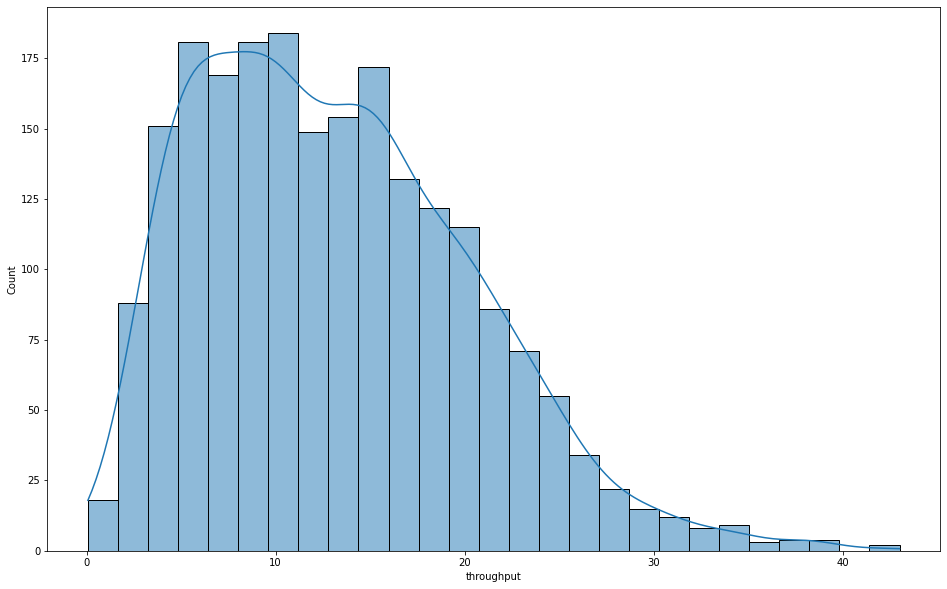

In [31]:
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='throughput',kde=True);
# note that the distribution is not normal (it resembles a exponential / Poisson distribution, which is a plaussible assumption for a communication model). Mass of the curve is shifted to the left. 

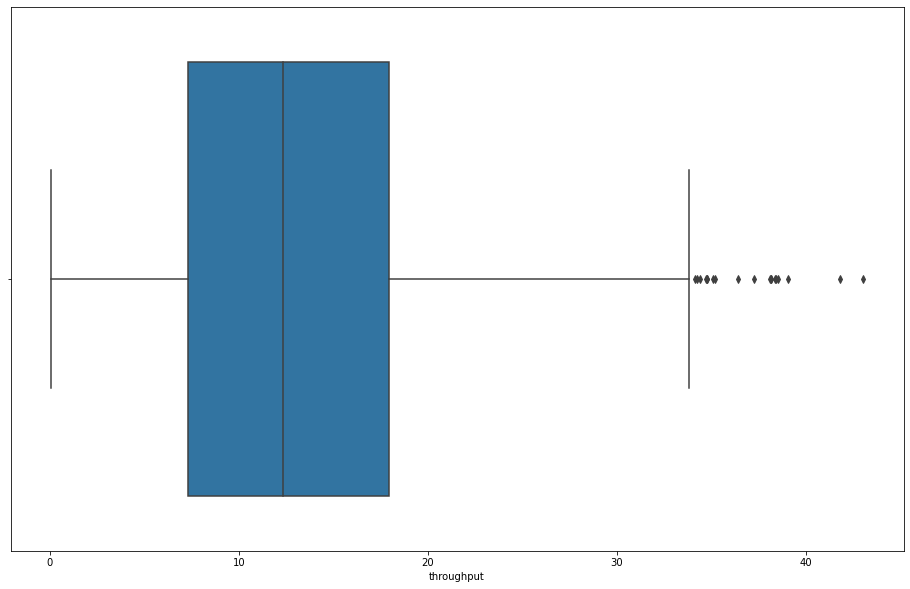

In [32]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='throughput');

# note some outliers by the IQR method 

# Correlation Heatmap
---

## Explore Correlation Heatmap

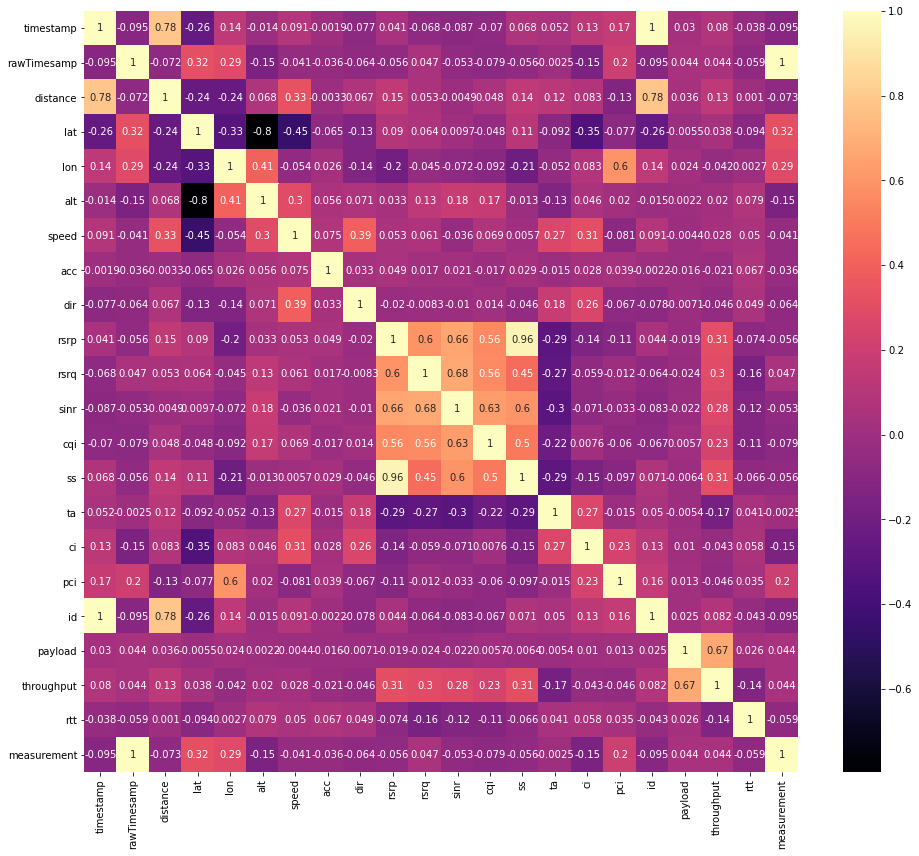

In [33]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

**Heatmap Finding**

**High Positive Correlation**
- id vs timestamp
- measuremet vs rawTimesamp
- rsrp vs ss (signal strength) 

**Positive Correlation**
- pci vs lon

**Negative Correlation**
- speed vs lat

**High Negative Correlation**
- alt vs lat

**Label**

Throughput shows non-zero correlations with features -> some signal will be picked by the model / no zero importance features

**Heatmap Finding Conclusion**

- Drop **id** and **measurement**: (a) both enconded in other features (b) irrelevant for our predictions (watch out for systematic errors in the experiment phase!) 

- For the reason delineated in (b) we also drop **pci** (physical cell id) (watch out for systematic errors in the experiment phase!) 

- Drop **ss**: calculated based off rsrp / linear transformation of rsrp -> will lead to decreased generalization performance of ML models

## Drop Features based on Heatmap Finding

In [34]:
df = df.drop('id',axis=1)
df = df.drop('measurement', axis=1)
df = df.drop('pci',axis=1)
df = df.drop('ss',axis=1)

# alt vs lat are highly correlated! 

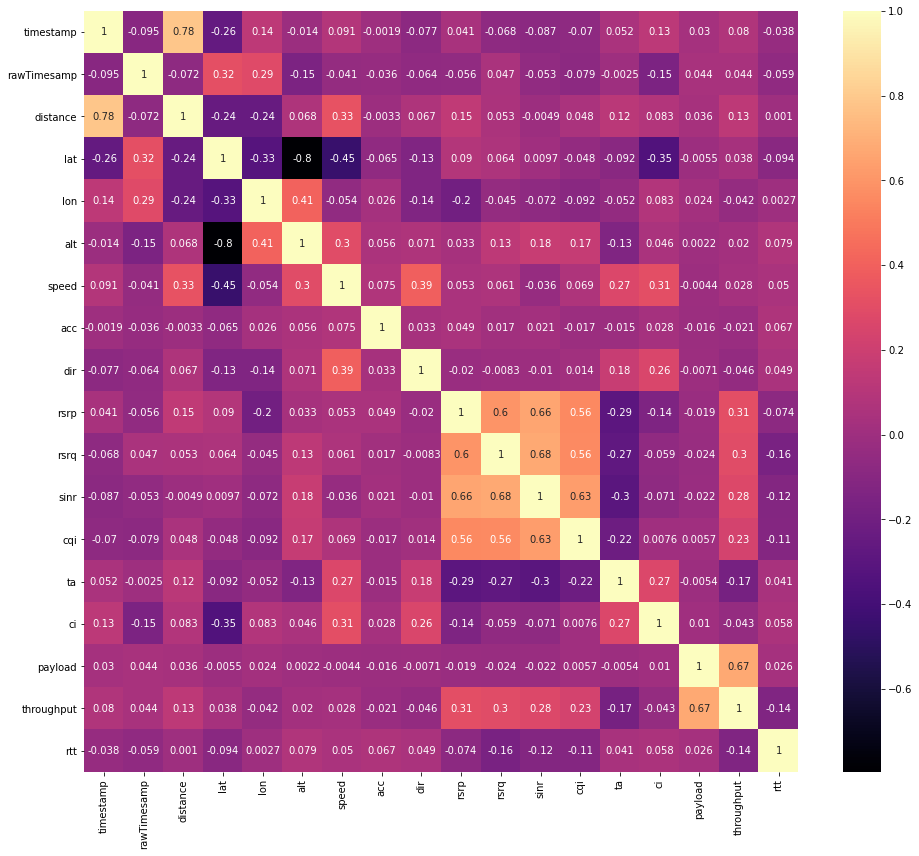

In [35]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

# Check for Missing Data
---

In [36]:
def percent_missing(df): 
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [37]:
percent_missing(df).sum()
# no misiing data

0.0

In [38]:
# Plot percentage of missing data as bar graph (no missing data in this case)

# percent_nan = percent_missing(df)
# 
# plt.figure(figsize=(10,8))
# sns.barplot(x=percent_nan.index,y=percent_nan)
# plt.xticks(rotation=90);

# Further Feature Exploration and Selection 
---

## Datetime

In [39]:
df_raw.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'measurement',
       'location'],
      dtype='object')

### timestamp Feature

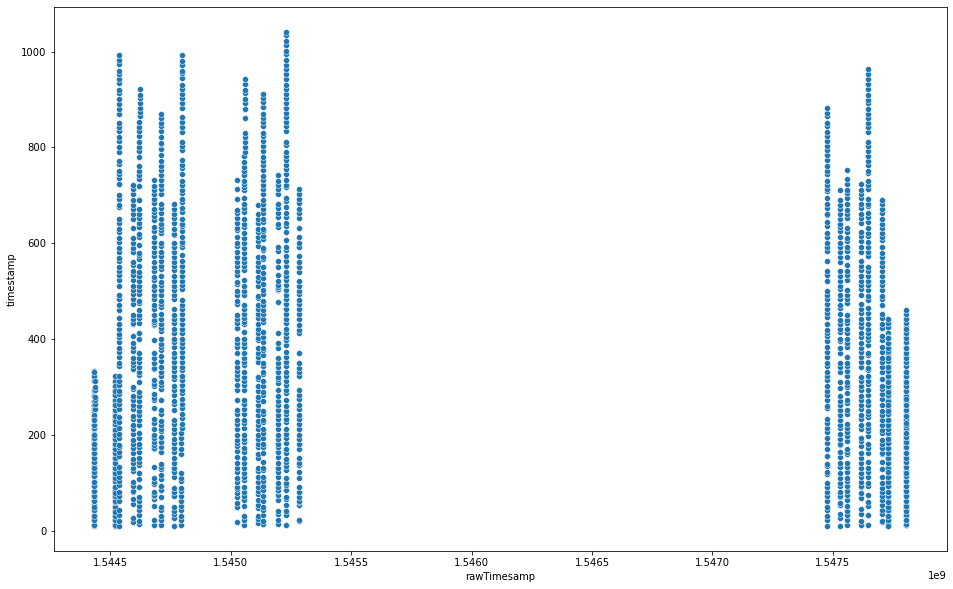

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='rawTimesamp',y='timestamp');
# timestamp seems to be an arbitrary value assigned on the datapoint depending on the particular experiment (measurement). 

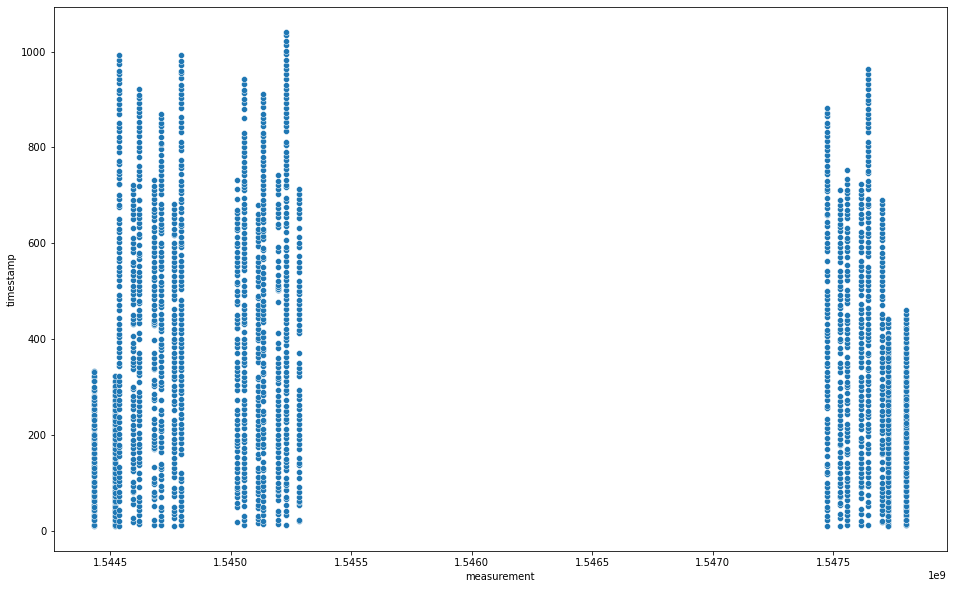

In [41]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='measurement',y='timestamp');

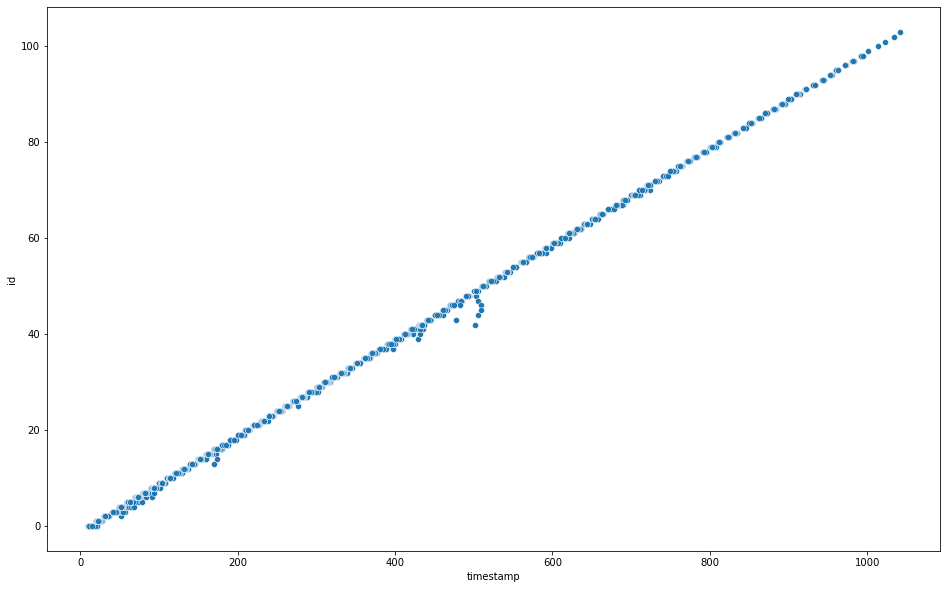

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, y='id',x='timestamp');

# note also the timestamp encondes id / higly correlated to id (as noted in the heatmap). We drop timestamp for the following reasons: (a) our predictions should be independent of vehicle / measurement id, (b) rawTimesamp functions as a datetime object for the data frame, and (c) we don't have enough context to interpret id

In [43]:
df = df.drop('timestamp', axis=1)

In [44]:
# we also rename rawTimesamp to better describe the feature
df = df.rename(columns={'rawTimesamp':'unix_time'})

In [45]:
# we rename location to better describe the feature
df = df.rename(columns={'location':'region'})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix_time   2141 non-null   int64  
 1   distance    2141 non-null   float64
 2   lat         2141 non-null   float64
 3   lon         2141 non-null   float64
 4   alt         2141 non-null   float64
 5   speed       2141 non-null   float64
 6   acc         2141 non-null   float64
 7   dir         2141 non-null   float64
 8   rsrp        2141 non-null   int64  
 9   rsrq        2141 non-null   int64  
 10  sinr        2141 non-null   int64  
 11  cqi         2141 non-null   int64  
 12  ta          2141 non-null   int64  
 13  ci          2141 non-null   int64  
 14  payload     2141 non-null   float64
 15  throughput  2141 non-null   float64
 16  rtt         2141 non-null   int64  
 17  region      2141 non-null   object 
dtypes: float64(9), int64(8), object(1)
memory usage: 301.2+ KB


**Features**
1. unix time
2. distance
3. location
    - latitude
    - longitude
    - altitude
4. mobility / motion
    - speed
    - acceleration
    - direction
5. LTE performance
    - rsrp
    - rsrq
    - sinr
    - cqi (categorical?)
    - ta (categorical?)
6. ci (categorical!)
7. payload
8. rtt
9. location -> region (categorical!)

### unix_time Feature

We break down Unix time into more useful (categorical) features. 

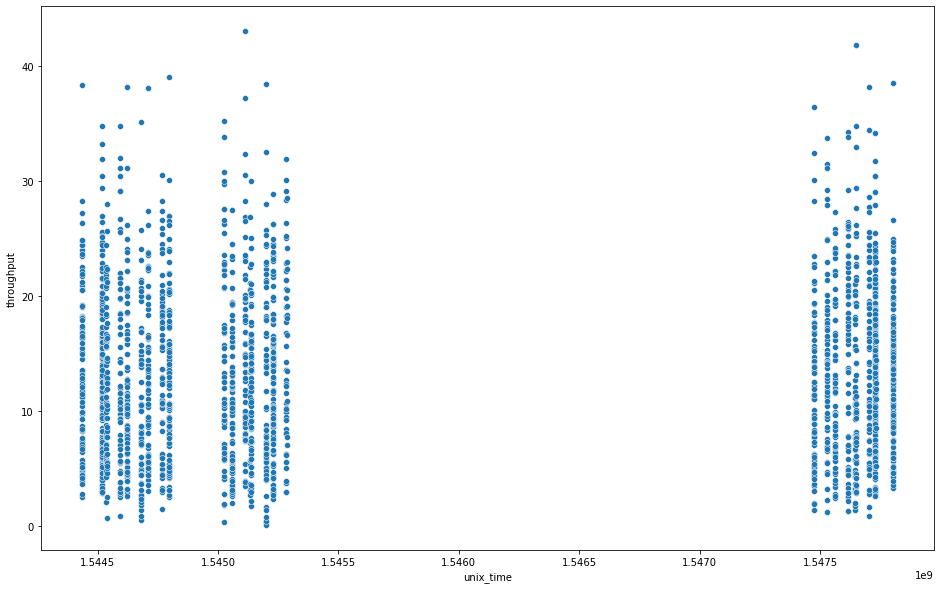

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='unix_time',y='throughput');

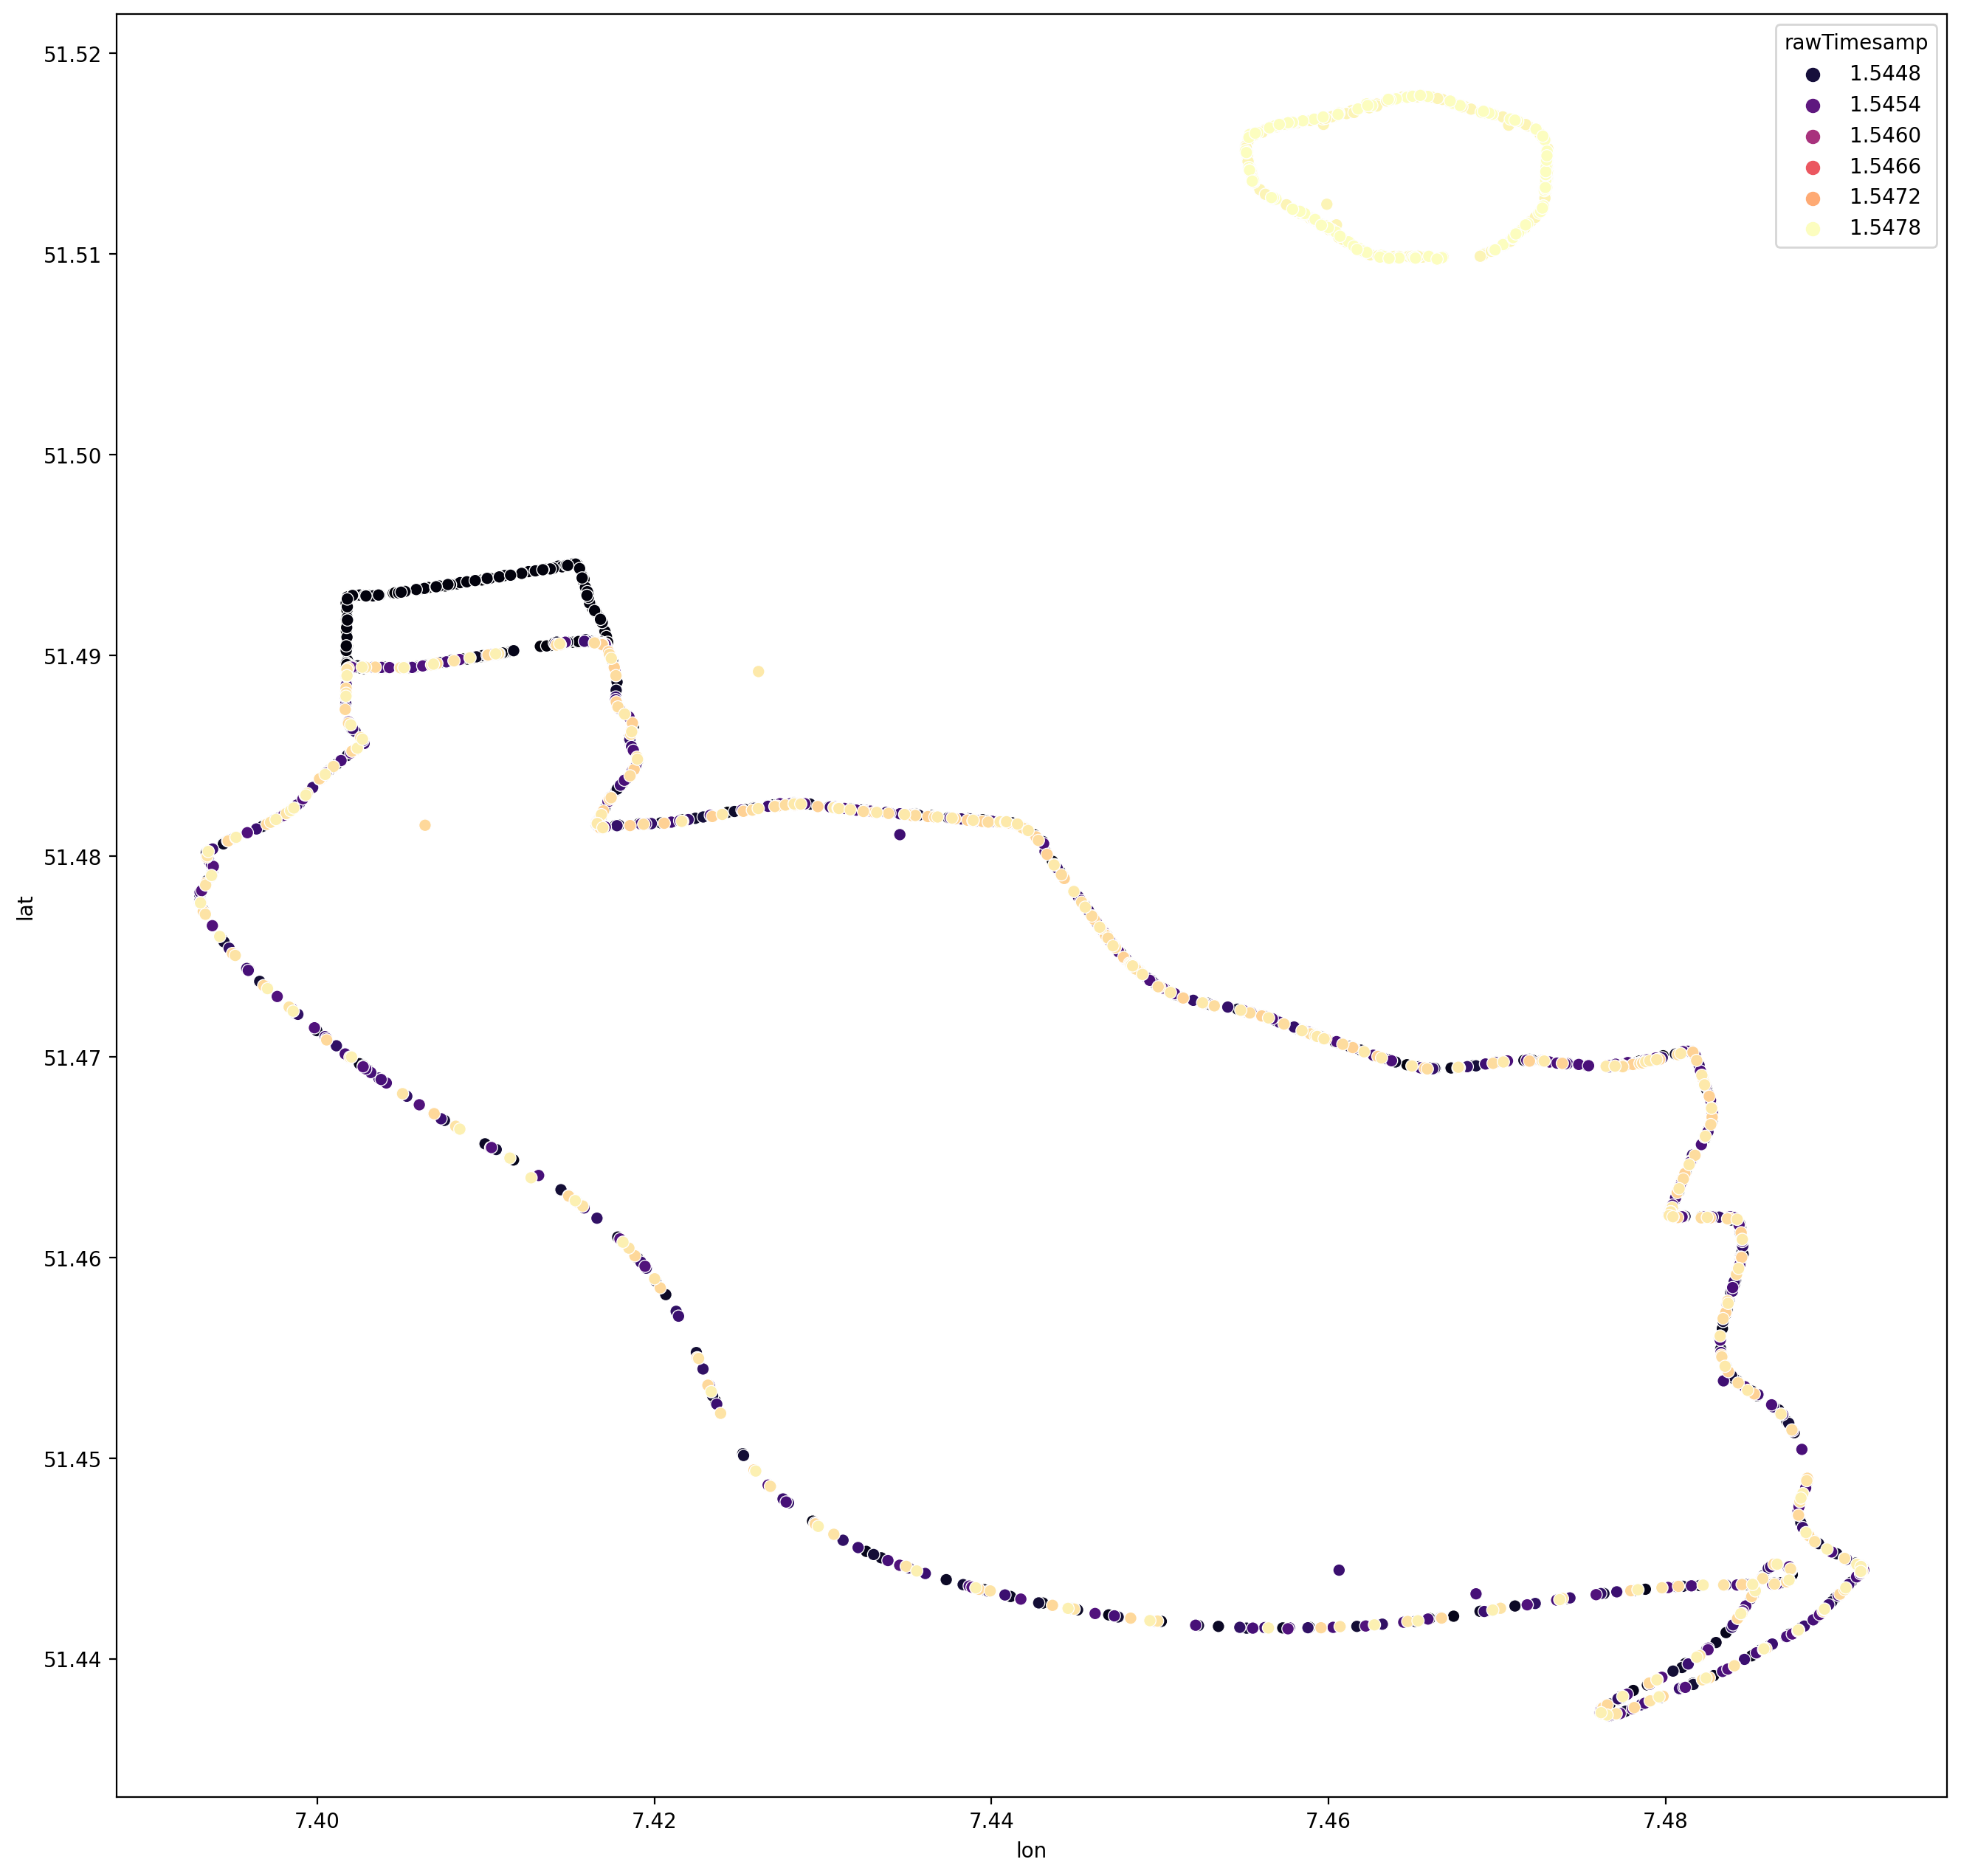

In [48]:
plt.figure(figsize=(16,16),dpi=200)
sns.scatterplot(data=df_raw, x='lon',y='lat',hue='rawTimesamp',palette='magma');

In [49]:
datetime_series = df['unix_time'].apply(lambda unix_time : datetime.fromtimestamp(unix_time))

In [50]:
datetime_series

0      2018-12-10 10:08:57
1      2018-12-10 10:09:09
2      2018-12-10 10:09:19
3      2018-12-10 10:09:33
4      2018-12-10 10:09:42
               ...        
2136   2019-01-18 10:22:10
2137   2019-01-18 10:22:23
2138   2019-01-18 10:22:30
2139   2019-01-18 10:22:41
2140   2019-01-18 10:22:49
Name: unix_time, Length: 2141, dtype: datetime64[ns]

In [51]:
datetime_series.apply(lambda dt : dt.year).unique()
# not enough data -> disregard

array([2018, 2019])

In [52]:
datetime_series.apply(lambda dt : dt.month).unique()
# not enough data -> disregard

array([12,  1])

In [53]:
datetime_series.apply(lambda dt : dt.hour).unique()
# might be interesting to engineer the features morning and afternoon -> dive deeper

array([10,  9,  6, 14, 15, 12, 13])

In [54]:
hour_arr = datetime_series.apply(lambda dt : dt.hour)

In [55]:
hour_df = pd.DataFrame(hour_arr)

In [56]:
hour_df = hour_df.rename({'unix_time':'hour'},axis=1)

In [57]:
hour_df.value_counts()
# distributed fairly evenly -> make categories morning (5 < t_0 < 11) and afternoon (11 < t_0 < 16), i.e. a binary categorical feature

hour
6       640
14      505
10      309
13      297
15      274
9       114
12        2
dtype: int64

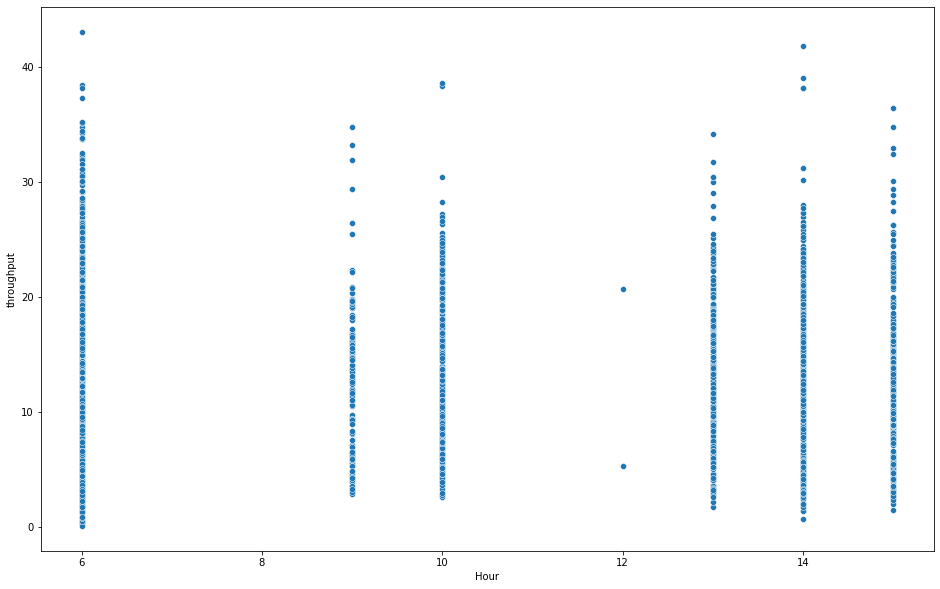

In [58]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=hour_arr,y=df['throughput'])
ax.set_xlabel('Hour');

In [59]:
# Originally we wanted to create categories based on different hour intervalls. This idea was scrapped. 

# def time_of_day(h): 
#     if h < 9: 
#         return 'early morning'
#     elif 9 <= h < 12: 
#         return 'morning'
#     elif 12 <= h < 14: 
#         return 'noon'
#     else: 
#         return 'evening'

In [60]:
# hour_df['hour'] = hour_df['hour'].apply(time_of_day)

In [61]:
# hour_df = hour_df.rename({'hour':'time'},axis=1)

In [62]:
# hour_df.value_counts()

In [63]:
# plt.figure(figsize=(16,10))
# ax = sns.scatterplot(x=hour_df['time'],y=df['throughput'])
# ax.set_xlabel('Time');

---

In [64]:
datetime_series.apply(lambda dt : dt.day_name()).unique()
# all days of the week -> dive deeper; we enconde the weekdays as integers

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [65]:
weekday_arr = datetime_series.apply(lambda dt : dt.day_name())

In [66]:
weekday_df = pd.DataFrame(weekday_arr)

In [67]:
weekday_df = weekday_df.rename({'unix_time':'weekday'},axis=1)

In [68]:
weekday_df.value_counts()
# make categorical feature weekday

weekday  
Tuesday      563
Thursday     493
Wednesday    462
Monday       324
Friday       299
dtype: int64

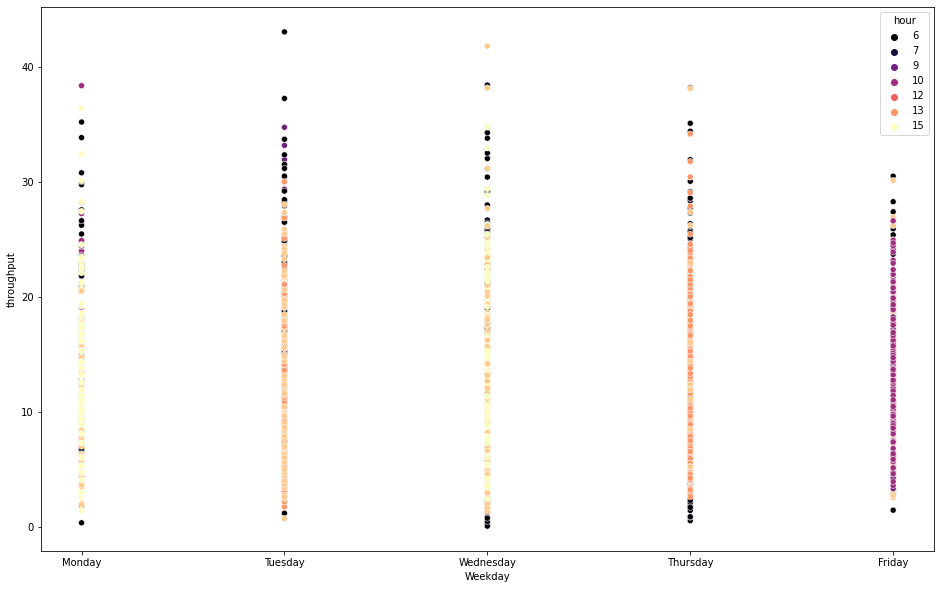

In [69]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=weekday_arr,y=df['throughput'],hue=hour_df['hour'],palette='magma')
ax.set_xlabel('Weekday');
# note that on Friday we mostly find data in the morning hours, on Monday and Wednesday mostly in the evening and on Tuesday and Thrusday around midday -> suggestion for experiment phase: take data throughout the day for all days

In [70]:
# add new features to df and drop unix_time: 
df['hour'] = hour_df['hour']
df['weekday'] = weekday_df['weekday']
df = df.drop('unix_time',axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    2141 non-null   float64
 1   lat         2141 non-null   float64
 2   lon         2141 non-null   float64
 3   alt         2141 non-null   float64
 4   speed       2141 non-null   float64
 5   acc         2141 non-null   float64
 6   dir         2141 non-null   float64
 7   rsrp        2141 non-null   int64  
 8   rsrq        2141 non-null   int64  
 9   sinr        2141 non-null   int64  
 10  cqi         2141 non-null   int64  
 11  ta          2141 non-null   int64  
 12  ci          2141 non-null   int64  
 13  payload     2141 non-null   float64
 14  throughput  2141 non-null   float64
 15  rtt         2141 non-null   int64  
 16  region      2141 non-null   object 
 17  hour        2141 non-null   int64  
 18  weekday     2141 non-null   object 
dtypes: float64(9), int64(8), ob

## Distance

In [72]:
df['distance'].describe()

count     2141.000000
mean      4273.932844
std       3774.430086
min         99.420000
25%       1365.830000
50%       2825.780000
75%       6435.790000
max      14124.020000
Name: distance, dtype: float64

## Mobility Context

### Position: Latitude, Longitude, and Altitude / Elevation

Note the small scale of the values -> normalization / standardization necessary!

In [73]:
df[['lat','lon','alt']].describe().transpose().drop('count',axis=1)
# standardize features!  

mean        std         min         25%         50%         75%  \
lat   51.478644   0.022528   51.437142   51.463083   51.481652   51.490668   
lon    7.445595   0.030796    7.393019    7.416637    7.450149    7.473018   
alt  177.235390  41.975692  125.060000  152.000000  163.700000  181.920000   

            max  
lat   51.517905  
lon    7.491755  
alt  297.820000

### Motion: Speed, Acceleration, and Direction

The ML Paper mentions trajectory of the vehicle as well (engineered featured; see ML Paper)

In [74]:
df[['speed','acc','dir']].describe().transpose().drop('count',axis=1)
# stardardize features!

mean        std    min    25%     50%     75%     max
speed   12.154703   8.870322   0.00   6.86   12.45   14.99   39.34
acc      0.004447   1.123975 -11.05   0.00    0.00    0.00   17.26
dir    164.828720  93.178596   0.03  92.30  150.27  250.64  359.98

### Cell ID

There is not enough context provided in the feature description. We assume CI represents Cell Id. In the Paper Cell Id is assigned to the Mobility Context. Note that if this is the case, we see the different cells in the map. 

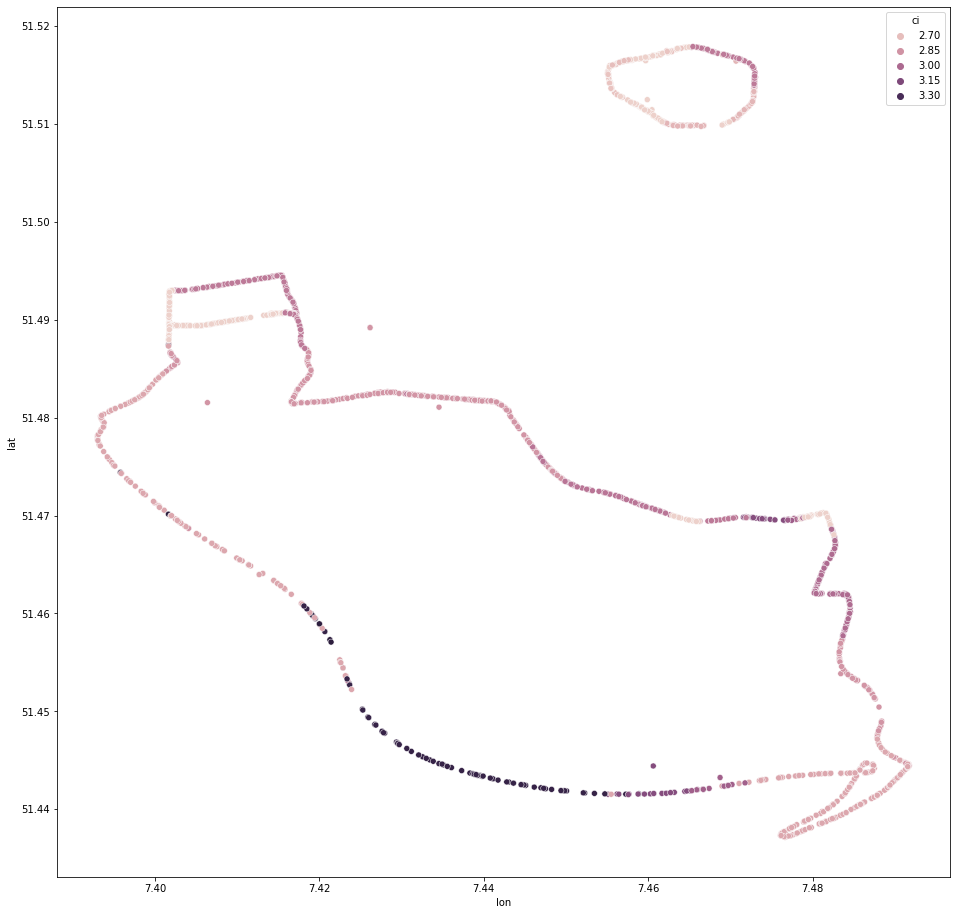

In [75]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='lon',y='lat',hue='ci'); 

In [76]:
df['ci'].describe()

count    2.141000e+03
mean     2.841641e+07
std      1.592816e+06
min      2.637671e+07
25%      2.729933e+07
50%      2.836506e+07
75%      2.939828e+07
max      3.383757e+07
Name: ci, dtype: float64

## Network Context / Channel Performance: RSRP, RSRQ, SINR, CQI, TA

The studies agree that passively measurable network quality indicators such as Reference Signal Received Power (RSRP), Reference Signal Received Quality (RSRQ), Signal- to-interference-plus-noise Ratio (SINR), and Channel Quality Indicator (CQI) provide meaningful information, which can be leveraged to estimate the resulting data rate based on machine learning methods even in challenging environments. We also consider Timing Advance (TA). 

In [77]:
df[['rsrp', 'rsrq','sinr', 'cqi', 'ta']].describe().transpose().drop('count',axis=1)

mean       std    min   25%   50%   75%   max
rsrp -88.519851  9.314856 -113.0 -95.0 -89.0 -83.0 -56.0
rsrq  -7.463802  2.091197  -19.0  -9.0  -7.0  -6.0  -4.0
sinr  13.448389  9.788405  -15.0   6.0  12.0  21.0  40.0
cqi    9.931808  3.325492    1.0   7.0  10.0  12.0  15.0
ta     7.036432  6.221577    0.0   3.0   6.0   9.0  94.0

## Application Context: Payload

In [78]:
df['payload'].describe()

count    2141.000000
mean        4.517468
std         3.232045
min         0.100000
25%         1.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: payload, dtype: float64

## Additional Features not found in the Paper

The Round Trip Time (RTT) and the Location (Region) are not mentioned as Features in the Paper but we'll consider them for our analyis

In [79]:
df[['rtt','region']].describe().transpose()
# region is a categorical feature

count       mean         std   min   25%   50%   75%     max
rtt  2141.0  71.218589  166.581665  29.0  37.0  46.0  71.0  5323.0

# Further Considerations: Location
---

## Investigate Correlation between Altitude and Latitude

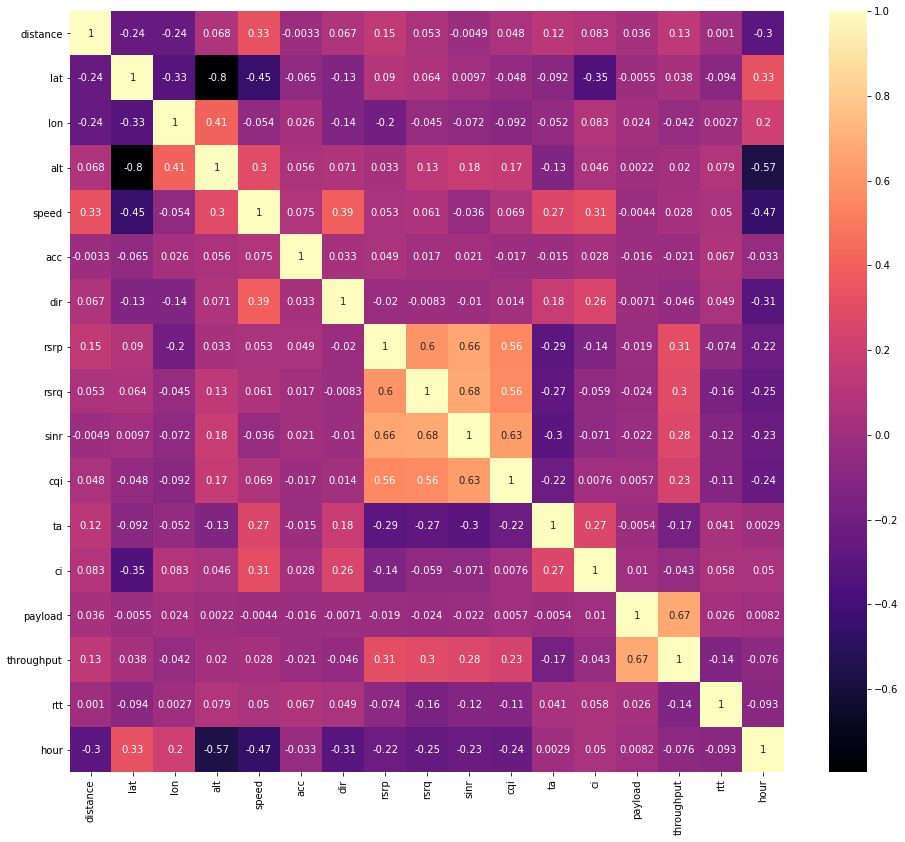

In [80]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);
# note the high negative correlation between altitude and latitude

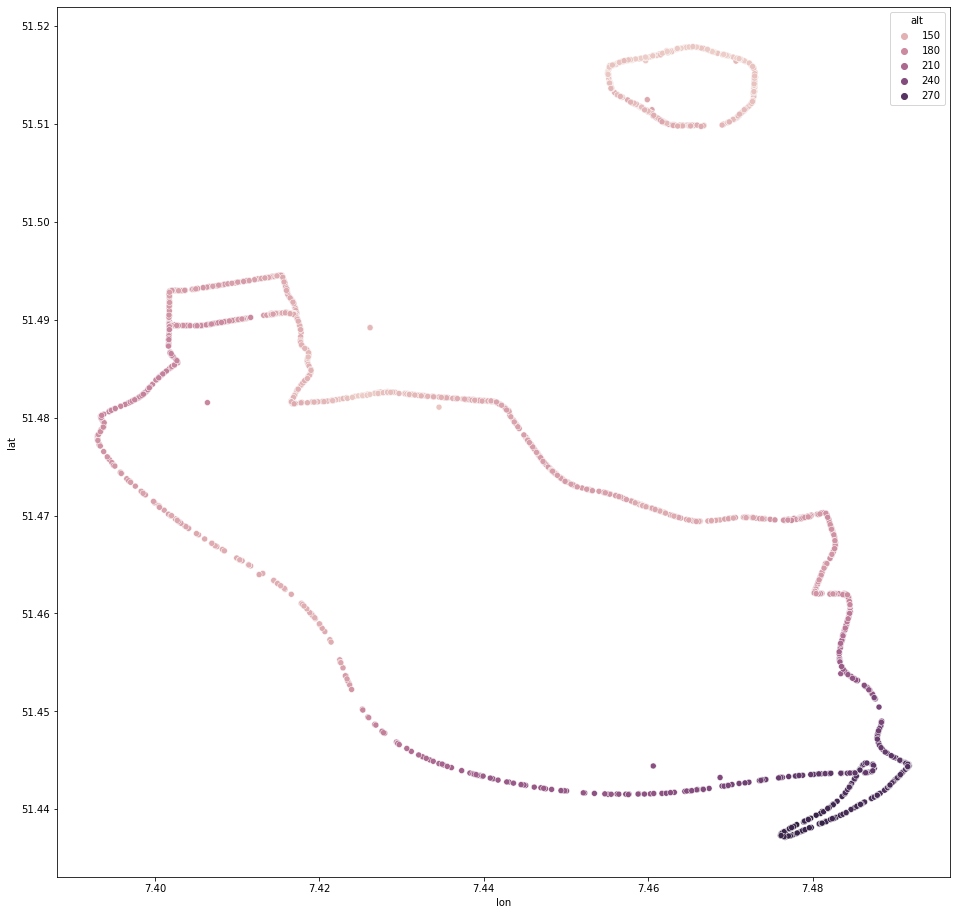

In [81]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='lon',y='lat',hue='alt');

# note that this high negative correlation could introduce systematic errors to our model -> suggestion in experiment phase: more variety of latitude, altitude tuples

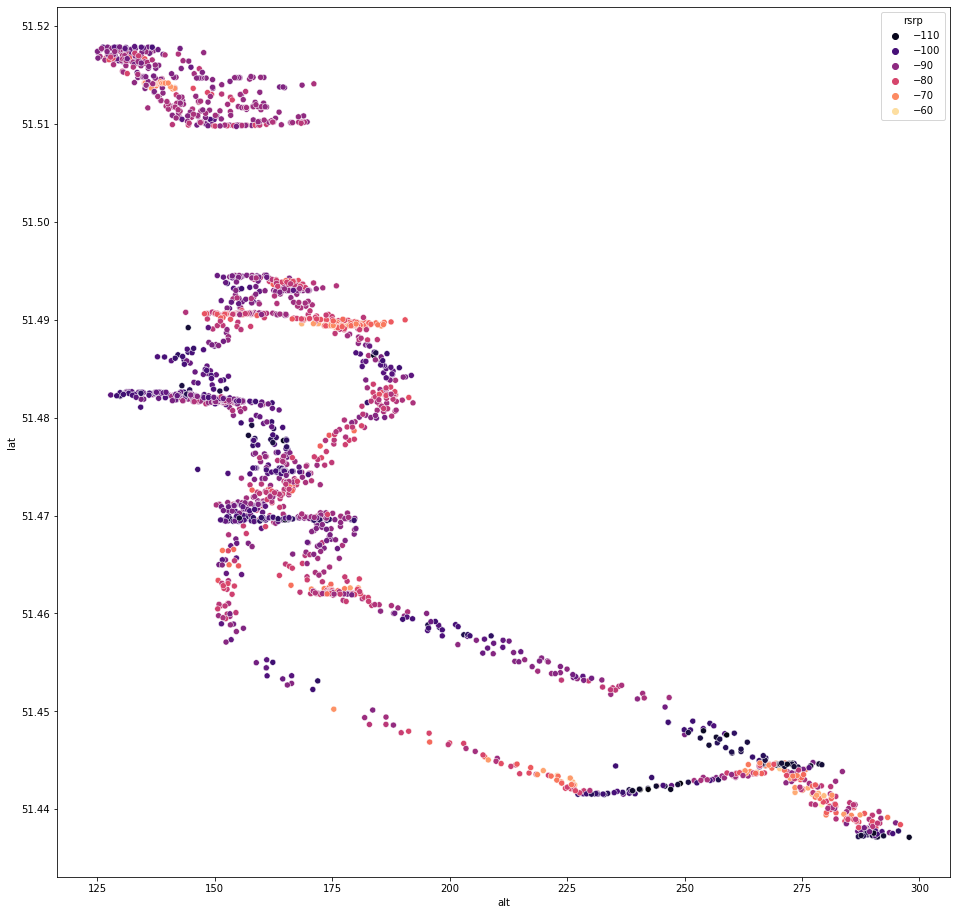

In [82]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='alt',y='lat',hue='rsrp',palette='magma');

# we see the high negative correlation between the features, but no particular pattern when considering the rsrp

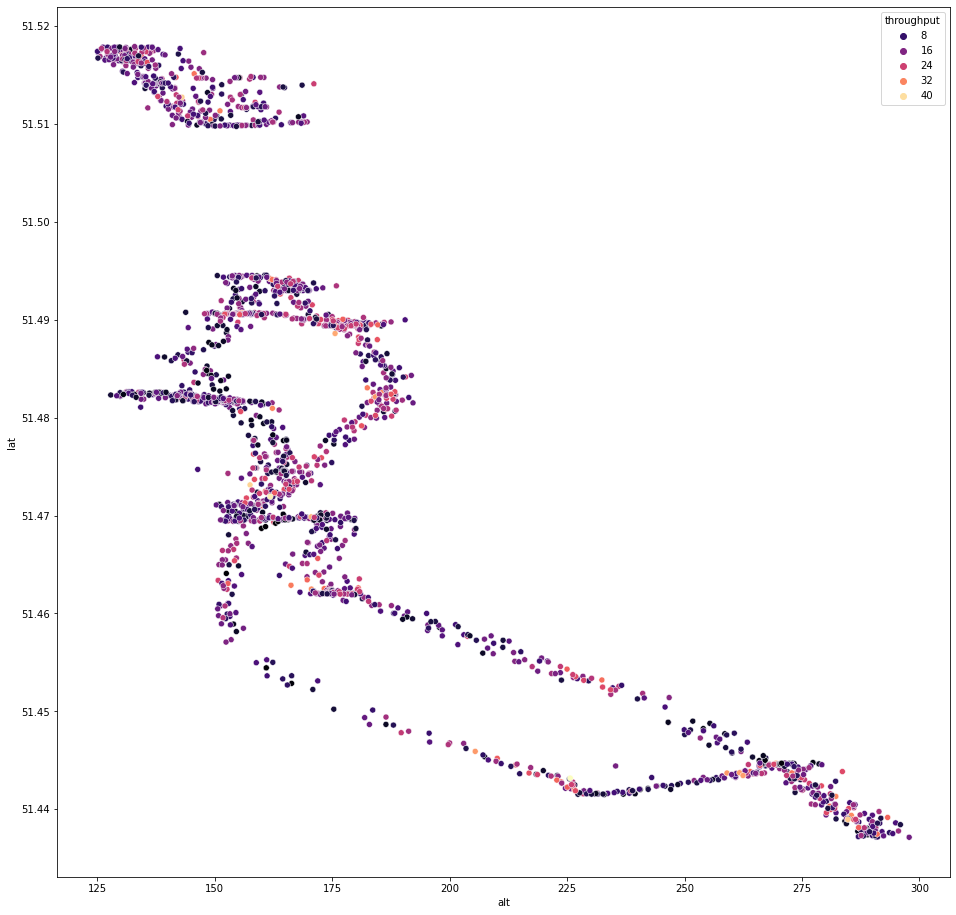

In [83]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='alt',y='lat',hue='throughput',palette='magma');

# we see the high negative correlation between the features, but no particular pattern when considering the throughput -> we won't drop either of the features

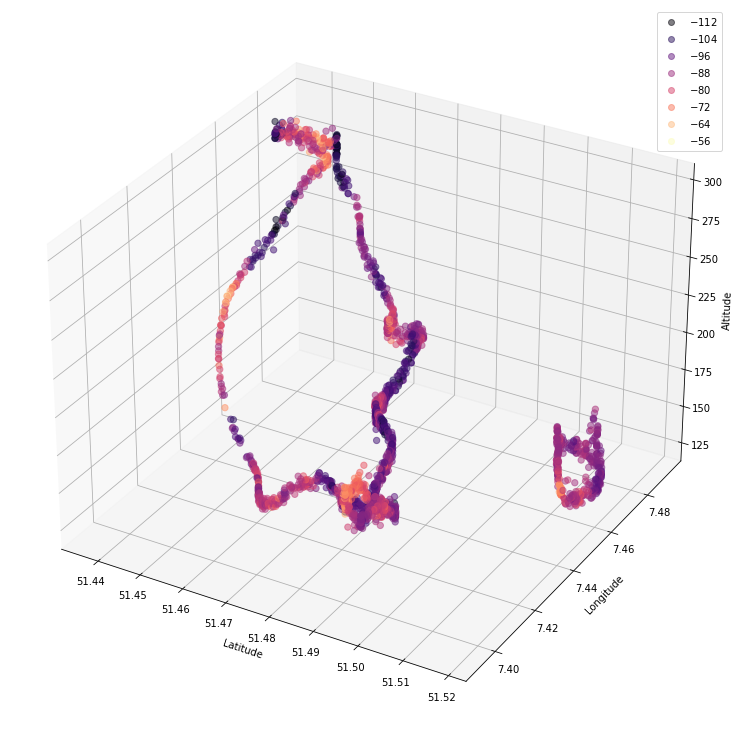

In [84]:
# we can visualize the rsrp in a 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

x = df['lat']
y = df['lon']
z = df['alt']
c = df['rsrp']

sc = ax.scatter(x,y,z,s=40,c=c,cmap='magma',alpha=.5)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

plt.legend(*sc.legend_elements(), loc='best');

# plt.savefig("scatter_hue", bbox_inches='tight')

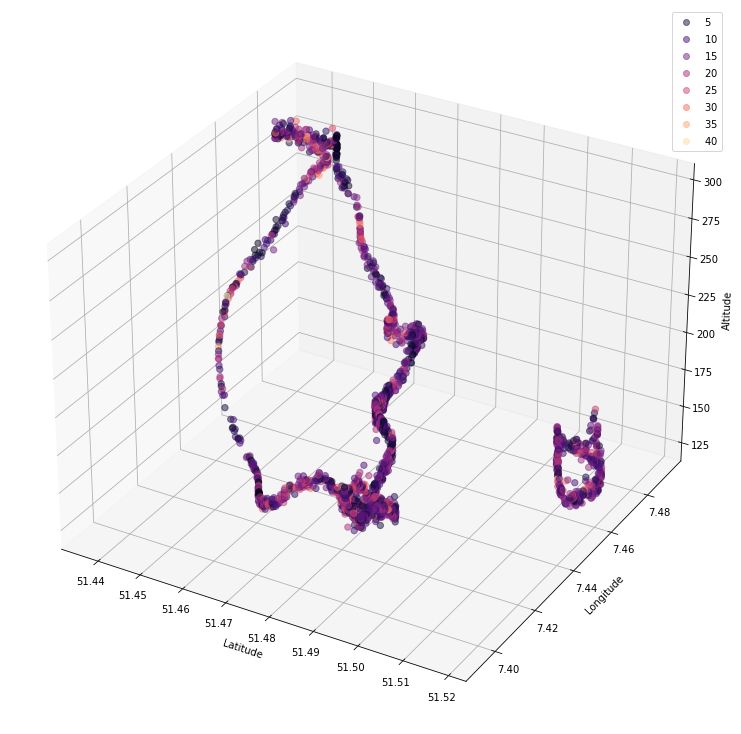

In [85]:
# we can visualize the throuhput in a 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

x = df['lat']
y = df['lon']
z = df['alt']
c = df['throughput']

sc = ax.scatter(x,y,z,s=40,c=c,cmap='magma',alpha=.5)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

plt.legend(*sc.legend_elements(), loc='best');

# plt.savefig("scatter_hue", bbox_inches='tight')

## Drop Data Points outside Street
We drop data points outside the street. These points are most likely measurement errors. We export the data to [Google Maps](https://www.google.com/maps/d/edit?mid=16uGNwcuE2fgafLTK6ZG4MUEpYxuT1L7w&usp=sharing) and impute invalid data points. Note that Google Maps can take max. 2000 data points. An alternative to this method is plotly (JavaScript configuration required). 

<img src="./figures/gmaps.png" width="600" alt="Architecture model for the client-based data rate prediction." class="center">

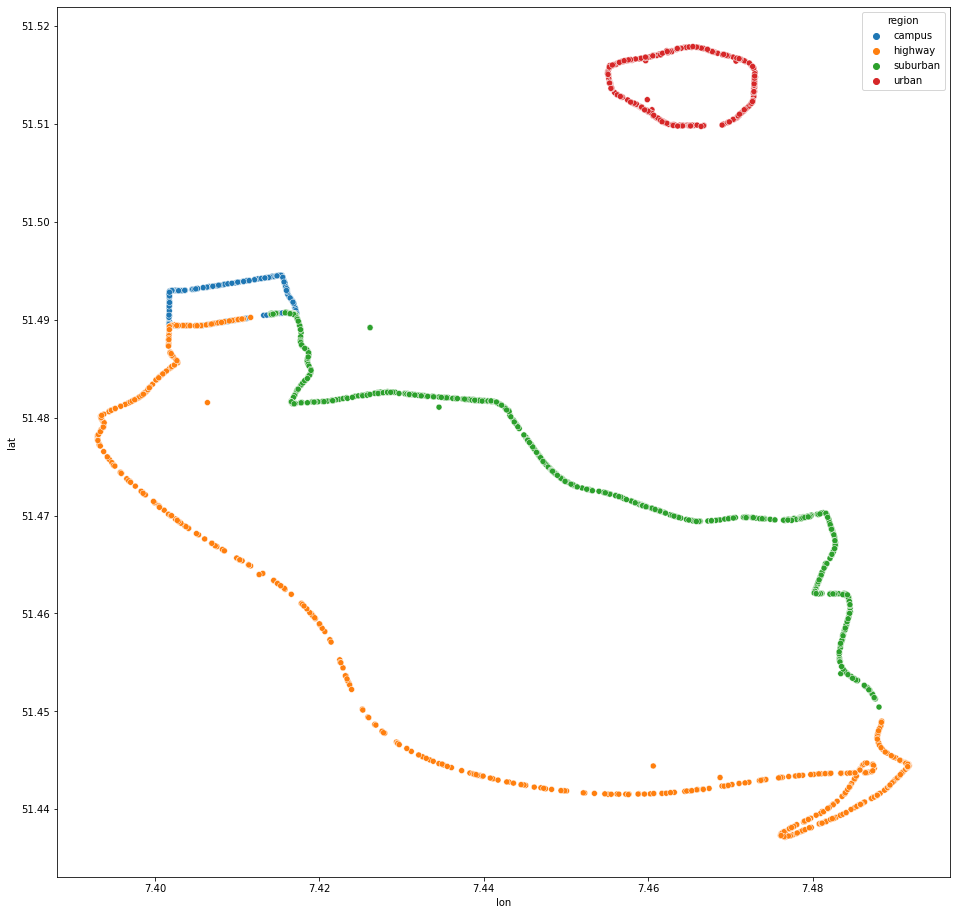

In [86]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='lon',y='lat',hue='region');

In [132]:
# Using Google Maps

df[['lon','lat','region']].to_csv('./data/dl-loc.csv', index=False)

# Afterwards convert Google Map to .CSV with https://www.gpsvisualizer.com/convert_input and download the .CSV file
# read in file and inner join with df on longitude and latitude

In [88]:
import plotly.express as px

fig = px.scatter(data_frame=df, x='lon',y='lat',hover_name=df.index)
fig.show()

# we drop rows with the following index: 780, 1695, 1369, 566, 1906, 629, 1549

In [89]:
df.head()

distance        lat       lon     alt  speed   acc     dir  rsrp  rsrq  \
0     99.42  51.490553  7.413966  157.63  11.83  0.00   79.35   -85    -5   
1    237.43  51.490715  7.416002  152.41  10.76 -0.52   89.45   -84    -6   
2    325.26  51.490668  7.417176  154.64   6.19 -0.62   27.05   -82    -6   
3    448.27  51.491839  7.416804  155.87   9.77 -0.98  342.45   -94    -9   
4    540.48  51.492531  7.416222  154.41  12.33  0.01  336.68   -90    -6   

   sinr  cqi  ta        ci  payload  throughput  rtt  region  hour weekday  
0    22   10   7  26385408      0.1     6.83763   41  campus    10  Monday  
1    11   13   4  29391105      2.0     9.71463   58  campus    10  Monday  
2    21   15   4  29391105      2.0     7.30594   57  campus    10  Monday  
3     9    9   4  29391105      3.0     3.94997  163  campus    10  Monday  
4    16    9   4  29391105      5.0     8.54884   59  campus    10  Monday

In [90]:
# drop location that do not exist in the urban region
df = df.drop([1906,1908,1902,1962])

In [91]:
# drop location that do not exist in the rest of the regions
df = df.drop([780, 1695, 1369, 566, 629,1549,1436])

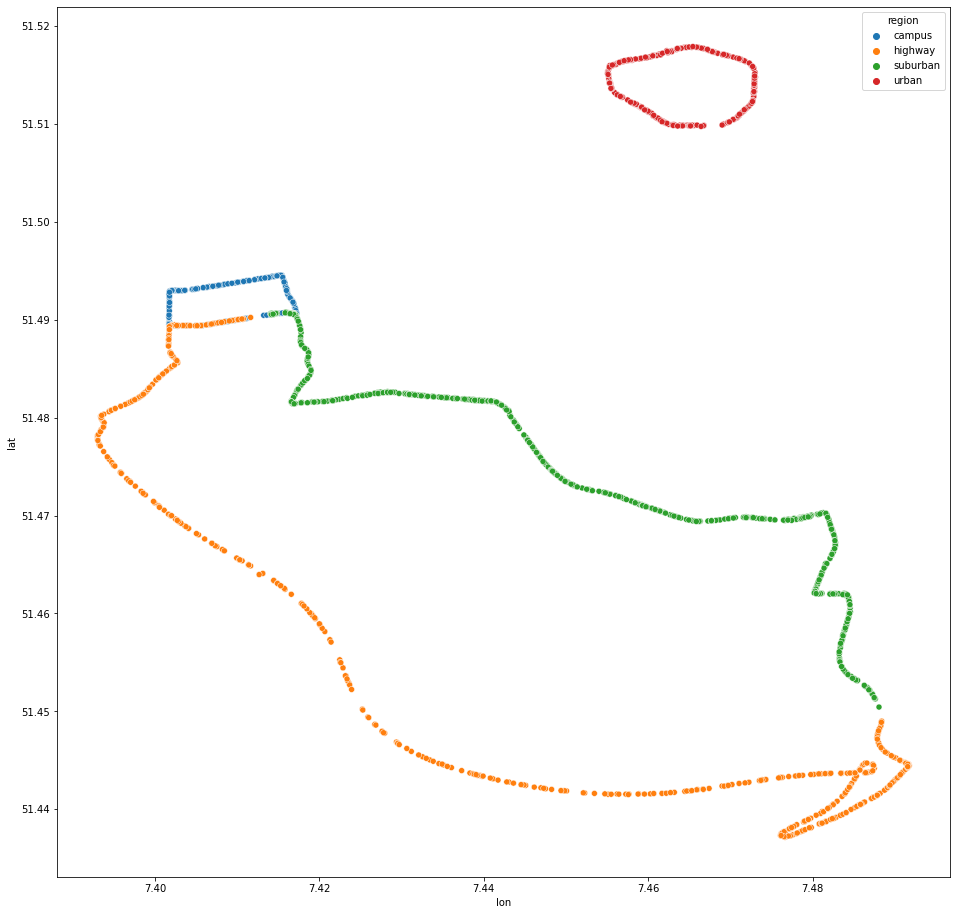

In [92]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='lon',y='lat',hue='region');

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130 entries, 0 to 2140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    2130 non-null   float64
 1   lat         2130 non-null   float64
 2   lon         2130 non-null   float64
 3   alt         2130 non-null   float64
 4   speed       2130 non-null   float64
 5   acc         2130 non-null   float64
 6   dir         2130 non-null   float64
 7   rsrp        2130 non-null   int64  
 8   rsrq        2130 non-null   int64  
 9   sinr        2130 non-null   int64  
 10  cqi         2130 non-null   int64  
 11  ta          2130 non-null   int64  
 12  ci          2130 non-null   int64  
 13  payload     2130 non-null   float64
 14  throughput  2130 non-null   float64
 15  rtt         2130 non-null   int64  
 16  region      2130 non-null   object 
 17  hour        2130 non-null   int64  
 18  weekday     2130 non-null   object 
dtypes: float64(9), int64(8), ob

# Check for Outliers

## IQR Methodology

In [94]:
label = df['throughput']

In [95]:
q75, q25 = np.percentile(a=label, q=[75,25])
IQR = q75 - q25

low_lim = q25-1.5*IQR
up_lim = q75+1.5*IQR

In [96]:
outliers = label[(label < low_lim) | (label > up_lim)]
len(outliers)

# there are 19 outlierts in the data set by IQR method 

19

In [97]:
f'Outliers are {len(outliers)/len(df)*100:.2f}% of the Download data according to the IQR Method'

'Outliers are 0.89% of the Download data according to the IQR Method'

In [98]:
# since the number is low we might consider dropping the these rows; note that the distribution of the throughput is not normal -> dive deeper to determine true outliers

## Check Feature Correlations with Label & Decide what constitutes an Outlier

In [99]:
df.corr()['throughput'].sort_values(ascending=False)
# note that payload is highly positively correlated to download throughput (it also makes sense that a higher payload produces a high throughput)

throughput    1.000000
payload       0.674116
rsrp          0.309762
rsrq          0.297359
sinr          0.276969
cqi           0.231980
distance      0.131514
lat           0.038434
speed         0.028654
alt           0.019803
acc          -0.020184
lon          -0.041924
ci           -0.043589
dir          -0.045692
hour         -0.075743
rtt          -0.136402
ta           -0.173646
Name: throughput, dtype: float64

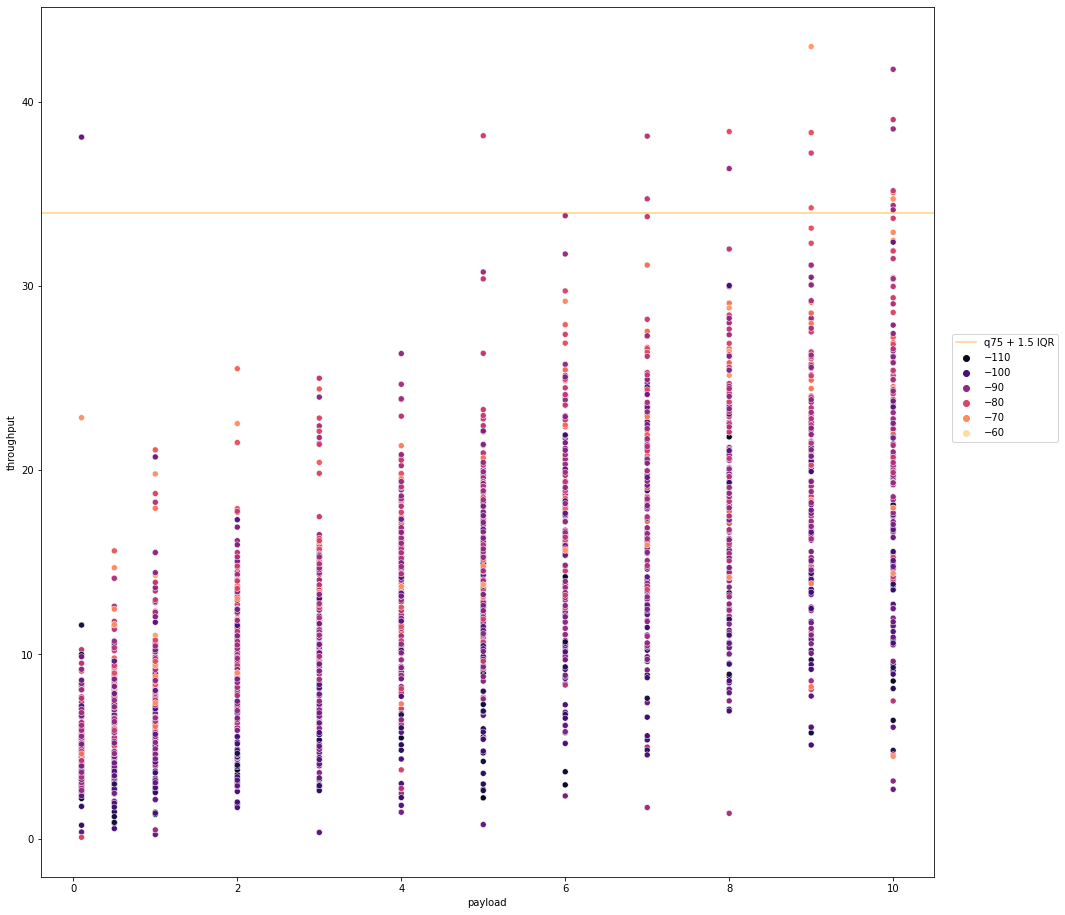

In [100]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='payload', y='throughput',hue='rsrp',palette='magma')

plt.axhline(y=up_lim,color='orange',alpha=.5,label='q75 + 1.5 IQR')

plt.legend(loc=(1.02,.5));

# note that within every payload size we have a distribution and as payload increses, so does the throughput but also the variane of the distribution within the payload -> not all data points above the upper limit are outliers per se 

In [101]:
np.sort(df['payload'].unique())
# precision of the payload column / x axis 

array([ 0.1,  0.5,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. ,
       10. ])

In [102]:
df.groupby('payload')['throughput'].std().sort_values()
# after droping the outliers we want to keep this relationship between the std's by payload

payload
0.5     2.895120
0.1     3.203671
1.0     3.696797
2.0     4.267645
3.0     4.732732
4.0     4.802508
5.0     5.394478
6.0     5.851944
7.0     6.124088
8.0     6.185665
9.0     6.834424
10.0    7.750779
Name: throughput, dtype: float64

In [103]:
df.groupby('payload')['throughput'].describe().transpose()

payload        0.1         0.5         1.0         2.0         3.0   \
count    194.000000  173.000000  189.000000  168.000000  186.000000   
mean       5.281329    6.734857    7.720226    9.593523   11.165460   
std        3.203671    2.895120    3.696797    4.267645    4.732732   
min        0.070194    0.542962    0.219262    1.686340    0.333060   
25%        4.113208    4.597700    5.438480    6.874335    7.536882   
50%        4.819300    6.932410    7.414270    9.400715   11.160500   
75%        5.673780    8.528780    9.445100   12.475650   13.783225   
max       38.095400   15.625000   21.108200   25.518300   25.000000   

payload        4.0         5.0         6.0         7.0         8.0   \
count    180.000000  198.000000  183.000000  161.000000  170.000000   
mean      13.448151   14.153209   16.366366   17.658091   18.276663   
std        4.802508    5.394478    5.851944    6.124088    6.185665   
min        1.431320    0.759503    2.314590    1.686490    1.371100   
25%       10.150775   10.678775   12.072500   13.438900   14.128850   
50%       14.311600   14.057300   16.528900   17.891400   18.532000   
75%       16.612575   17.726625   20.033400   21.713800   22.533225   
max       26.337400   38.167900   33.826600   38.147100   38.392300   

payload        9.0         10.0  
count    157.000000  171.000000  
mean      19.417842   19.989089  
std        6.834424    7.750779  
min        5.080080    2.672640  
25%       14.616300   14.517350  
50%       19.391300   19.915400  
75%       23.391800   24.711650  
max       43.010800   41.775500

In [104]:
# we remove the outliers with the same method delineated above
fig = px.scatter(data_frame=df, x='payload',y='throughput',hover_name=df.index)
fig.show()

# we drop rows with the following index: 1111, 1835, 871, 569, 1011, 646, 645

In [105]:
# remove outliers left of the mean
df = df.drop([646, 645,641,644])

In [106]:
# remove outliert right of the mean
df = df.drop([1111, 1835, 871, 569,612,1011,507,338])

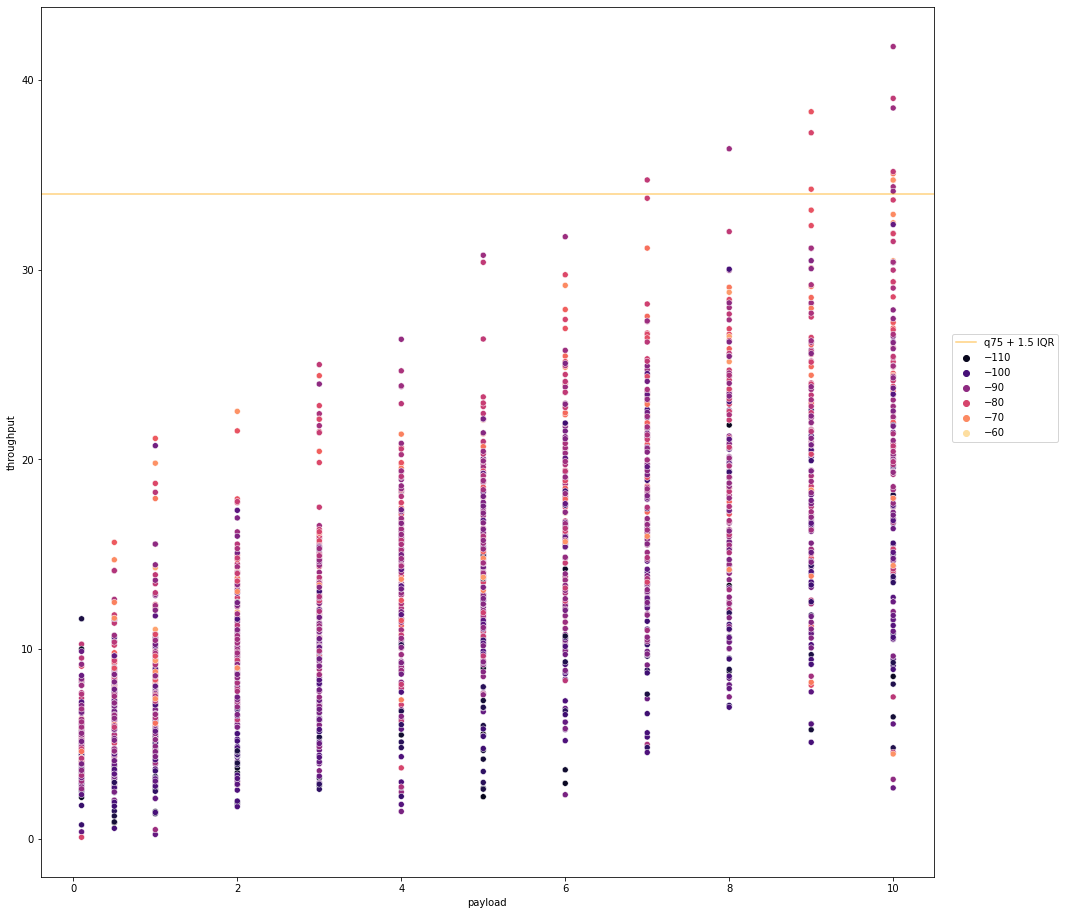

In [107]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='payload', y='throughput',hue='rsrp',palette='magma')

plt.axhline(y=up_lim,color='orange',alpha=.5,label='q75 + 1.5 IQR')

plt.legend(loc=(1.02,.5));

In [108]:
df.groupby('payload')['throughput'].std().sort_values()

payload
0.1     1.745537
0.5     2.895120
1.0     3.696797
2.0     4.097031
3.0     4.677533
4.0     4.802508
5.0     5.051582
6.0     5.721965
7.0     5.805765
8.0     5.880984
9.0     6.587604
10.0    7.750779
Name: throughput, dtype: float64

**Comment**: we use a visualization and our (qualitative) judgement to remove outliers. Note that an alternative to this would be an algorithm that (a) groups the data points by payload and (b) removes the outliers per payload by considering an IQR or STD method. Since we have to do the outlier removal operation only once, we won't automate this process

---

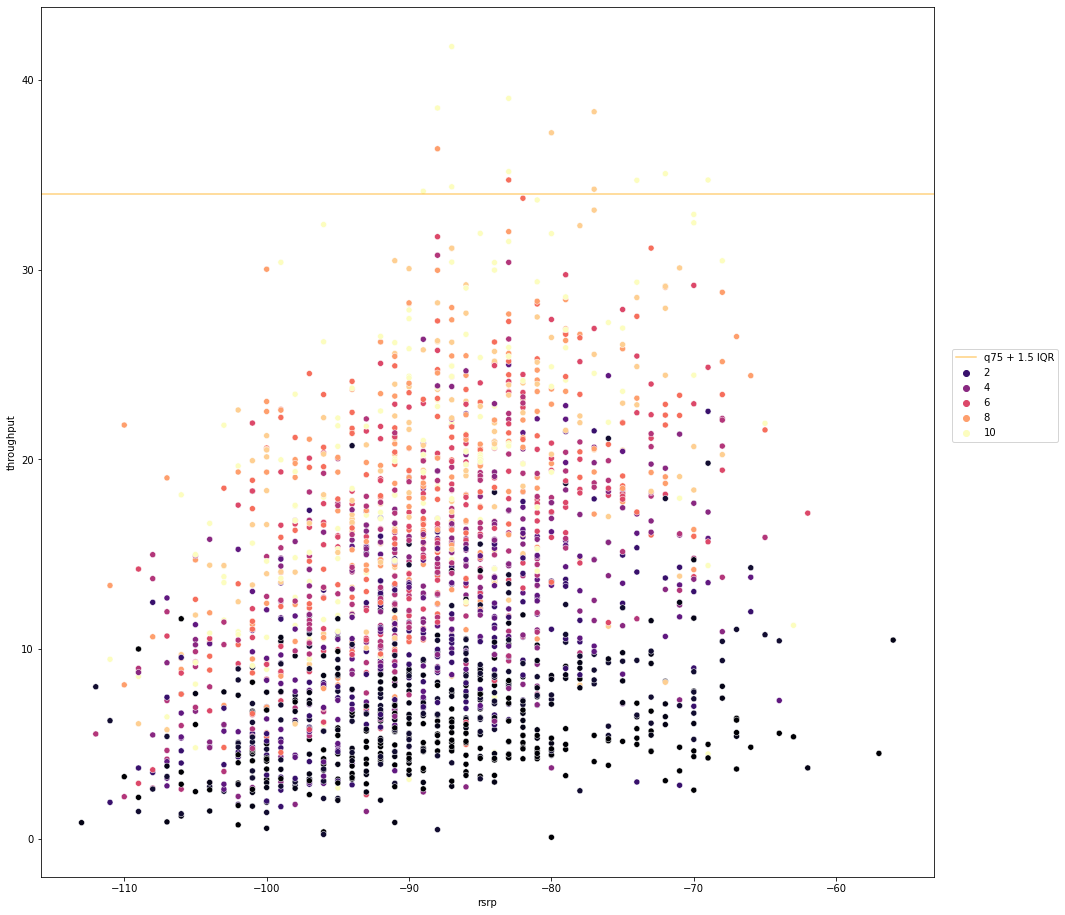

In [109]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df, x='rsrp', y='throughput',hue='payload',palette='magma')

plt.axhline(y=up_lim,color='orange',alpha=.5,label='q75 + 1.5 IQR')

plt.legend(loc=(1.02,.5));

In [110]:
df.head()

distance        lat       lon     alt  speed   acc     dir  rsrp  rsrq  \
0     99.42  51.490553  7.413966  157.63  11.83  0.00   79.35   -85    -5   
1    237.43  51.490715  7.416002  152.41  10.76 -0.52   89.45   -84    -6   
2    325.26  51.490668  7.417176  154.64   6.19 -0.62   27.05   -82    -6   
3    448.27  51.491839  7.416804  155.87   9.77 -0.98  342.45   -94    -9   
4    540.48  51.492531  7.416222  154.41  12.33  0.01  336.68   -90    -6   

   sinr  cqi  ta        ci  payload  throughput  rtt  region  hour weekday  
0    22   10   7  26385408      0.1     6.83763   41  campus    10  Monday  
1    11   13   4  29391105      2.0     9.71463   58  campus    10  Monday  
2    21   15   4  29391105      2.0     7.30594   57  campus    10  Monday  
3     9    9   4  29391105      3.0     3.94997  163  campus    10  Monday  
4    16    9   4  29391105      5.0     8.54884   59  campus    10  Monday

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    2118 non-null   float64
 1   lat         2118 non-null   float64
 2   lon         2118 non-null   float64
 3   alt         2118 non-null   float64
 4   speed       2118 non-null   float64
 5   acc         2118 non-null   float64
 6   dir         2118 non-null   float64
 7   rsrp        2118 non-null   int64  
 8   rsrq        2118 non-null   int64  
 9   sinr        2118 non-null   int64  
 10  cqi         2118 non-null   int64  
 11  ta          2118 non-null   int64  
 12  ci          2118 non-null   int64  
 13  payload     2118 non-null   float64
 14  throughput  2118 non-null   float64
 15  rtt         2118 non-null   int64  
 16  region      2118 non-null   object 
 17  hour        2118 non-null   int64  
 18  weekday     2118 non-null   object 
dtypes: float64(9), int64(8), ob

In [134]:
df.to_csv('./data/dl-pfe-ns-nd.csv', index=False)
# pfe = post feature engineering
# ns = not scaled
# nd = no dummy variables

# Encoding Categorical Features

We create dummy variables for the following features: 
- region
- ci (we don't have enough domain knowledge to check if this is a correct assumption)

Cre 

The following ordinal features remain unchanged (not enough domain knowledge, but by reading the articles we can infer there is an order to the variable values).
- [CQI](https://ytd2525.wordpress.com/2014/02/02/cqi-channel-quality-indicator/)

In [113]:
cat_features = ['ci','region','weekday']
cat_df = df[cat_features].copy()

In [114]:
cat_df.head()

ci  region weekday
0  26385408  campus  Monday
1  29391105  campus  Monday
2  29391105  campus  Monday
3  29391105  campus  Monday
4  29391105  campus  Monday

In [115]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2140
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ci       2118 non-null   int64 
 1   region   2118 non-null   object
 2   weekday  2118 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [116]:
cat_df['ci'] = cat_df['ci'].apply(str)

# ignore warning; in our case this is the output we expect

In [117]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2140
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ci       2118 non-null   object
 1   region   2118 non-null   object
 2   weekday  2118 non-null   object
dtypes: object(3)
memory usage: 66.2+ KB


In [118]:
non_cat_df = df.drop(cat_features, axis=1)

In [119]:
non_cat_df.head()

distance        lat       lon     alt  speed   acc     dir  rsrp  rsrq  \
0     99.42  51.490553  7.413966  157.63  11.83  0.00   79.35   -85    -5   
1    237.43  51.490715  7.416002  152.41  10.76 -0.52   89.45   -84    -6   
2    325.26  51.490668  7.417176  154.64   6.19 -0.62   27.05   -82    -6   
3    448.27  51.491839  7.416804  155.87   9.77 -0.98  342.45   -94    -9   
4    540.48  51.492531  7.416222  154.41  12.33  0.01  336.68   -90    -6   

   sinr  cqi  ta  payload  throughput  rtt  hour  
0    22   10   7      0.1     6.83763   41    10  
1    11   13   4      2.0     9.71463   58    10  
2    21   15   4      2.0     7.30594   57    10  
3     9    9   4      3.0     3.94997  163    10  
4    16    9   4      5.0     8.54884   59    10

In [120]:
cat_df_dummies = pd.get_dummies(cat_df, drop_first=True)

In [121]:
cat_df_dummies

ci_26378497  ci_26378498  ci_26378754  ci_26378755  ci_26379013  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
2136            0            0            0            1            0   
2137            0            0            0            0            0   
2138            0            0            0            0            0   
2139            0            0            0            0            0   
2140            0            0            0            0            0   

      ci_26385408  ci_26385409  ci_26385410  ci_26796290  ci_26796291  ...  \
0               1            0            0            0            0  ...   
1               0            0            0            0            0  ...   
2               0            0            0            0            0  ...   
3               0            0            0            0            0  ...   
4               0            0            0            0            0  ...   
...           ...          ...          ...          ...          ...  ...   
2136            0            0            0            0            0  ...   
2137            0            0            0            0            0  ...   
2138            0            0            0            0            0  ...   
2139            0            0            0            0            0  ...   
2140            0            0            0            0            0  ...   

      ci_33527559  ci_33527561  ci_33837570  region_highway  region_suburban  \
0               0            0            0               0                0   
1               0            0            0               0                0   
2               0            0            0               0                0   
3               0            0            0               0                0   
4               0            0            0               0                0   
...           ...          ...          ...             ...              ...   
2136            0            0            0               0                0   
2137            0            0            0               0                0   
2138            0            0            0               0                0   
2139            0            0            0               0                0   
2140            0            0            0               0                0   

      region_urban  weekday_Monday  weekday_Thursday  weekday_Tuesday  \
0                0               1                 0                0   
1                0               1                 0                0   
2                0               1                 0                0   
3                0               1                 0                0   
4                0               1                 0                0   
...            ...             ...               ...              ...   
2136             1               0                 0                0   
2137             1               0                 0                0   
2138             1               0                 0                0   
2139             1               0                 0                0   
2140             1               0                 0                0   

      weekday_Wednesday  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
2136                  0  
2137                  0  
2138                  0  
2139                  0  
2140                  0  

[2118 rows x 69 columns]

In [122]:
final_df = pd.concat([non_cat_df, cat_df_dummies],axis=1)

In [123]:
final_df.head()

distance        lat       lon     alt  speed   acc     dir  rsrp  rsrq  \
0     99.42  51.490553  7.413966  157.63  11.83  0.00   79.35   -85    -5   
1    237.43  51.490715  7.416002  152.41  10.76 -0.52   89.45   -84    -6   
2    325.26  51.490668  7.417176  154.64   6.19 -0.62   27.05   -82    -6   
3    448.27  51.491839  7.416804  155.87   9.77 -0.98  342.45   -94    -9   
4    540.48  51.492531  7.416222  154.41  12.33  0.01  336.68   -90    -6   

   sinr  ...  ci_33527559  ci_33527561  ci_33837570  region_highway  \
0    22  ...            0            0            0               0   
1    11  ...            0            0            0               0   
2    21  ...            0            0            0               0   
3     9  ...            0            0            0               0   
4    16  ...            0            0            0               0   

   region_suburban  region_urban  weekday_Monday  weekday_Thursday  \
0                0             0               1                 0   
1                0             0               1                 0   
2                0             0               1                 0   
3                0             0               1                 0   
4                0             0               1                 0   

   weekday_Tuesday  weekday_Wednesday  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  

[5 rows x 85 columns]

In [124]:
final_df.corr()['throughput'].sort_values()

ta            -0.172809
rtt           -0.153207
ci_28365056   -0.100282
ci_28368386   -0.098994
ci_28371201   -0.098250
                 ...   
sinr           0.274748
rsrq           0.294131
rsrp           0.306616
payload        0.688662
throughput     1.000000
Name: throughput, Length: 85, dtype: float64

In [125]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2140
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           2118 non-null   float64
 1   lat                2118 non-null   float64
 2   lon                2118 non-null   float64
 3   alt                2118 non-null   float64
 4   speed              2118 non-null   float64
 5   acc                2118 non-null   float64
 6   dir                2118 non-null   float64
 7   rsrp               2118 non-null   int64  
 8   rsrq               2118 non-null   int64  
 9   sinr               2118 non-null   int64  
 10  cqi                2118 non-null   int64  
 11  ta                 2118 non-null   int64  
 12  payload            2118 non-null   float64
 13  throughput         2118 non-null   float64
 14  rtt                2118 non-null   int64  
 15  hour               2118 non-null   int64  
 16  ci_26378497        2118 

In [126]:
# originally we were going to move the label to the end of the data frame but we decided against it
# cols = list(df.columns)
# cols.pop(cols.index('throughput'))
# 
# df = df[cols+['throughput']]

In [127]:
final_df.head()

distance        lat       lon     alt  speed   acc     dir  rsrp  rsrq  \
0     99.42  51.490553  7.413966  157.63  11.83  0.00   79.35   -85    -5   
1    237.43  51.490715  7.416002  152.41  10.76 -0.52   89.45   -84    -6   
2    325.26  51.490668  7.417176  154.64   6.19 -0.62   27.05   -82    -6   
3    448.27  51.491839  7.416804  155.87   9.77 -0.98  342.45   -94    -9   
4    540.48  51.492531  7.416222  154.41  12.33  0.01  336.68   -90    -6   

   sinr  ...  ci_33527559  ci_33527561  ci_33837570  region_highway  \
0    22  ...            0            0            0               0   
1    11  ...            0            0            0               0   
2    21  ...            0            0            0               0   
3     9  ...            0            0            0               0   
4    16  ...            0            0            0               0   

   region_suburban  region_urban  weekday_Monday  weekday_Thursday  \
0                0             0               1                 0   
1                0             0               1                 0   
2                0             0               1                 0   
3                0             0               1                 0   
4                0             0               1                 0   

   weekday_Tuesday  weekday_Wednesday  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  

[5 rows x 85 columns]

In [128]:
final_df.shape

(2118, 85)

# Export Final DataFrame
Note that we didn't encode categorical Features! 

In [136]:
final_df.to_csv('./data/dl-pfe-ns.csv', index=False)
# pfe = post feature engineering
# ns = not scaled